In [38]:
# import data
import pandas as pd
import numpy as np

data = pd.read_csv("Order.csv", low_memory=False)
data

,Customer_Code,Sales_Order_date,Order_Amount
0,15232,2021-09-09,121500.0
1,15232,2021-09-09,97200.0
2,14948,2021-09-09,115250.0
3,15000,2021-09-09,194400.0
4,15033,2021-09-09,196000.0
...,...,...,...
261972,83666,2023-08-21,174900.0
261973,14999,2023-08-21,197750.0
261974,14855,2023-08-21,146380.0
261975,14989,2023-08-21,312400.0


In [39]:
# datetime convert
data["Sales_Order_date"] = pd.to_datetime(data["Sales_Order_date"])

In [40]:
# missing value
data.isnull().sum()

Customer_Code       0
Sales_Order_date    0
Order_Amount        0
dtype: int64

In [41]:
# duplicate issue
data.duplicated().sum()

92148

In [42]:
# duplicate rows
data[data.duplicated()]

,Customer_Code,Sales_Order_date,Order_Amount
8,14801,2021-09-09,461000.0
12,14801,2021-09-09,230500.0
13,14801,2021-09-09,230500.0
20,14831,2021-09-09,238000.0
21,16798,2021-09-09,46100.0
...,...,...,...
261966,14856,2023-08-21,113000.0
261967,14986,2023-08-21,113600.0
261968,66245,2023-08-21,56800.0
261970,14915,2023-08-21,113600.0


In [43]:
data = data.drop_duplicates()
data

,Customer_Code,Sales_Order_date,Order_Amount
0,15232,2021-09-09,121500.0
1,15232,2021-09-09,97200.0
2,14948,2021-09-09,115250.0
3,15000,2021-09-09,194400.0
4,15033,2021-09-09,196000.0
...,...,...,...
261971,14855,2023-08-21,135120.0
261973,14999,2023-08-21,197750.0
261974,14855,2023-08-21,146380.0
261975,14989,2023-08-21,312400.0


In [46]:
data = data.groupby(["Customer_Code", "Sales_Order_date"])["Order_Amount"].sum().reset_index()
data

,Customer_Code,Sales_Order_date,Order_Amount
0,14252,2021-09-01,461.0
1,14252,2021-09-05,322700.0
2,14252,2021-09-08,115250.0
3,14252,2021-09-09,691500.0
4,14252,2021-09-15,161350.0
...,...,...,...
94237,87702,2023-08-17,369200.0
94238,87702,2023-08-20,113600.0
94239,87702,2023-08-21,198800.0
94240,87702,2023-08-22,170400.0


In [47]:
# data sort and get date diff
data.sort_values(["Customer_Code", "Sales_Order_date"], inplace=True)
data["date_diff"] = data.groupby("Customer_Code")["Sales_Order_date"].diff().dt.days

In [48]:
data[data["date_diff"] == 0]

,Customer_Code,Sales_Order_date,Order_Amount,date_diff


In [49]:
#  target data prepare
data["next_buy"] = data.groupby("Customer_Code")["date_diff"].shift(-1)
data

,Customer_Code,Sales_Order_date,Order_Amount,date_diff,next_buy
0,14252,2021-09-01,461.0,NaN,4.0
1,14252,2021-09-05,322700.0,4.0,3.0
2,14252,2021-09-08,115250.0,3.0,1.0
3,14252,2021-09-09,691500.0,1.0,6.0
4,14252,2021-09-15,161350.0,6.0,1.0
...,...,...,...,...,...
94237,87702,2023-08-17,369200.0,3.0,3.0
94238,87702,2023-08-20,113600.0,3.0,1.0
94239,87702,2023-08-21,198800.0,1.0,1.0
94240,87702,2023-08-22,170400.0,1.0,NaN


In [50]:
# remove date_diff and remove null
data = data.drop(columns=["date_diff"])
data = data.dropna()
data

,Customer_Code,Sales_Order_date,Order_Amount,next_buy
0,14252,2021-09-01,461.0,4.0
1,14252,2021-09-05,322700.0,3.0
2,14252,2021-09-08,115250.0,1.0
3,14252,2021-09-09,691500.0,6.0
4,14252,2021-09-15,161350.0,1.0
...,...,...,...,...
94234,87685,2023-08-14,115400.0,2.0
94236,87702,2023-08-14,397600.0,3.0
94237,87702,2023-08-17,369200.0,3.0
94238,87702,2023-08-20,113600.0,1.0


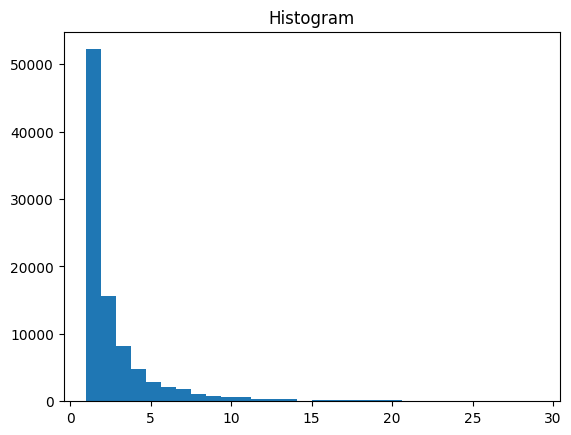

In [52]:
import matplotlib.pyplot as plt
plt.hist(data[data["next_buy"]< 30]["next_buy"], bins=30)
plt.title("Histogram")
plt.show()

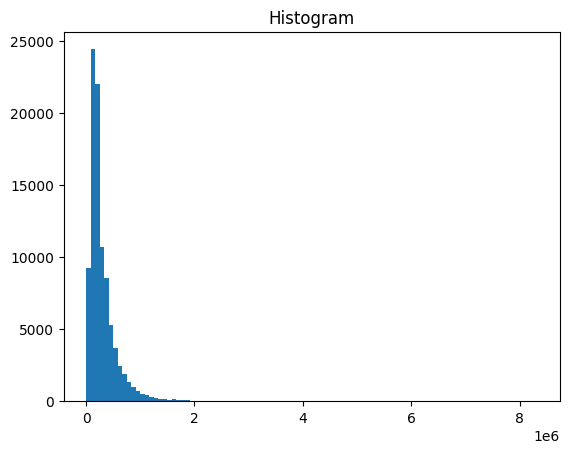

In [56]:
plt.hist(x=data["Order_Amount"], bins=100)

plt.title("Histogram")
plt.show()

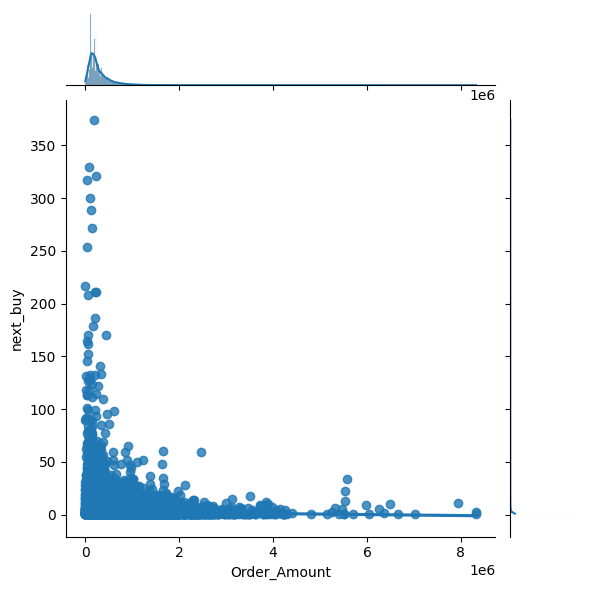

In [57]:
import seaborn as sns

sns.jointplot(x="Order_Amount", y="next_buy", data=data, kind="reg")
plt.show()

In [58]:
data["sales_day"] = data["Sales_Order_date"].dt.day
data["sales_day_of_week"] = data["Sales_Order_date"].dt.dayofweek
data["sales_month"] = data["Sales_Order_date"].dt.month
data["sales_days_in_month"] = data["Sales_Order_date"].dt.days_in_month # number of days in that month

data

,Customer_Code,Sales_Order_date,Order_Amount,next_buy,sales_day,sales_day_of_week,sales_month,sales_days_in_month
0,14252,2021-09-01,461.0,4.0,1,2,9,30
1,14252,2021-09-05,322700.0,3.0,5,6,9,30
2,14252,2021-09-08,115250.0,1.0,8,2,9,30
3,14252,2021-09-09,691500.0,6.0,9,3,9,30
4,14252,2021-09-15,161350.0,1.0,15,2,9,30
...,...,...,...,...,...,...,...,...
94234,87685,2023-08-14,115400.0,2.0,14,0,8,31
94236,87702,2023-08-14,397600.0,3.0,14,0,8,31
94237,87702,2023-08-17,369200.0,3.0,17,3,8,31
94238,87702,2023-08-20,113600.0,1.0,20,6,8,31


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

x = data[["Order_Amount", "sales_day", "sales_day_of_week", "sales_month", "sales_days_in_month"]]
y = data["next_buy"]

x_train, x_test, y_train, y_test = train_test_split(
        x, y, random_state=1, test_size=0.3,
        shuffle=True)

In [63]:
model = LinearRegression()
trained_model = model.fit(x_train, y_train)
y_pred = trained_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(2.2467530021280693, 0.006630991429894539)

In [64]:
data[-5:]

,Customer_Code,Sales_Order_date,Order_Amount,next_buy,sales_day,sales_day_of_week,sales_month,sales_days_in_month
94234,87685,2023-08-14,115400.0,2.0,14,0,8,31
94236,87702,2023-08-14,397600.0,3.0,14,0,8,31
94237,87702,2023-08-17,369200.0,3.0,17,3,8,31
94238,87702,2023-08-20,113600.0,1.0,20,6,8,31
94239,87702,2023-08-21,198800.0,1.0,21,0,8,31


In [65]:
feature = ["Order_Amount", "sales_day", "sales_day_of_week", "sales_month", "sales_days_in_month"]
trained_model.predict(data[-5:][feature])

array([2.81476606, 2.65828289, 2.74920892, 2.96611997, 3.02341938])

In [66]:
# customer summary
customer_order_summary = data.groupby("Customer_Code")["Order_Amount"].agg(["mean", "median", "max", "min']).reset_index()
customer_date_summary = data.groupby("Customer_Code")['next_buy'].agg(['mean', 'median', 'max', 'min']).reset_index()

In [68]:
customer_order_summary

,Customer_Code,mean,median,max,min
0,14252,245908.374302,192400.0,1072600.0,461.0
1,14273,147350.000000,116250.0,332500.0,48500.0
2,14314,120214.285714,148500.0,198000.0,49500.0
3,14322,375150.661157,306600.0,1736000.0,27900.0
4,14333,337057.657040,271500.0,2916000.0,27650.0
...,...,...,...,...,...
494,87312,87009.090909,56300.0,225200.0,28150.0
495,87313,347634.000000,297135.0,602640.0,83700.0
496,87569,165244.444444,171600.0,343200.0,57200.0
497,87685,115400.000000,115400.0,115400.0,115400.0


In [69]:
customer_date_summary = customer_date_summary.add_prefix('date_')
customer_order_summary = customer_order_summary.add_prefix('order_')
customer_date_summary

,date_Customer_Code,date_mean,date_median,date_max,date_min
0,14252,3.027933,1.0,47.0,1.0
1,14273,4.200000,3.0,9.0,1.0
2,14314,22.000000,10.0,53.0,3.0
3,14322,1.481405,1.0,12.0,1.0
4,14333,2.523466,1.0,21.0,1.0
...,...,...,...,...,...
494,87312,3.363636,3.0,7.0,1.0
495,87313,3.800000,2.0,13.0,1.0
496,87569,2.222222,3.0,4.0,1.0
497,87685,2.000000,2.0,2.0,2.0


In [70]:
customer_order_summary

,order_Customer_Code,order_mean,order_median,order_max,order_min
0,14252,245908.374302,192400.0,1072600.0,461.0
1,14273,147350.000000,116250.0,332500.0,48500.0
2,14314,120214.285714,148500.0,198000.0,49500.0
3,14322,375150.661157,306600.0,1736000.0,27900.0
4,14333,337057.657040,271500.0,2916000.0,27650.0
...,...,...,...,...,...
494,87312,87009.090909,56300.0,225200.0,28150.0
495,87313,347634.000000,297135.0,602640.0,83700.0
496,87569,165244.444444,171600.0,343200.0,57200.0
497,87685,115400.000000,115400.0,115400.0,115400.0


In [72]:
customer_summary = customer_date_summary.merge(
    customer_order_summary,
    right_on="order_Customer_Code",
    left_on="date_Customer_Code"
)
customer_summary = customer_summary.drop(columns=["date_Customer_Code"])
customer_summary

,date_mean,date_median,date_max,date_min,order_Customer_Code,order_mean,order_median,order_max,order_min
0,3.027933,1.0,47.0,1.0,14252,245908.374302,192400.0,1072600.0,461.0
1,4.200000,3.0,9.0,1.0,14273,147350.000000,116250.0,332500.0,48500.0
2,22.000000,10.0,53.0,3.0,14314,120214.285714,148500.0,198000.0,49500.0
3,1.481405,1.0,12.0,1.0,14322,375150.661157,306600.0,1736000.0,27900.0
4,2.523466,1.0,21.0,1.0,14333,337057.657040,271500.0,2916000.0,27650.0
...,...,...,...,...,...,...,...,...,...
494,3.363636,3.0,7.0,1.0,87312,87009.090909,56300.0,225200.0,28150.0
495,3.800000,2.0,13.0,1.0,87313,347634.000000,297135.0,602640.0,83700.0
496,2.222222,3.0,4.0,1.0,87569,165244.444444,171600.0,343200.0,57200.0
497,2.000000,2.0,2.0,2.0,87685,115400.000000,115400.0,115400.0,115400.0


In [73]:
data = data.merge(customer_summary, right_on="order_Customer_Code", left_on="Customer_Code")
data = data.drop(columns=["order_Customer_Code"])
data

,Customer_Code,Sales_Order_date,Order_Amount,next_buy,sales_day,sales_day_of_week,sales_month,sales_days_in_month,date_mean,date_median,date_max,date_min,order_mean,order_median,order_max,order_min
0,14252,2021-09-01,461.0,4.0,1,2,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
1,14252,2021-09-05,322700.0,3.0,5,6,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
2,14252,2021-09-08,115250.0,1.0,8,2,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
3,14252,2021-09-09,691500.0,6.0,9,3,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
4,14252,2021-09-15,161350.0,1.0,15,2,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93732,87685,2023-08-14,115400.0,2.0,14,0,8,31,2.000000,2.0,2.0,2.0,115400.000000,115400.0,115400.0,115400.0
93733,87702,2023-08-14,397600.0,3.0,14,0,8,31,2.000000,2.0,3.0,1.0,269800.000000,284000.0,397600.0,113600.0
93734,87702,2023-08-17,369200.0,3.0,17,3,8,31,2.000000,2.0,3.0,1.0,269800.000000,284000.0,397600.0,113600.0
93735,87702,2023-08-20,113600.0,1.0,20,6,8,31,2.000000,2.0,3.0,1.0,269800.000000,284000.0,397600.0,113600.0


In [75]:
data.columns

Index(['Customer_Code', 'Sales_Order_date', 'Order_Amount', 'next_buy',
       'sales_day', 'sales_day_of_week', 'sales_month', 'sales_days_in_month',
       'date_mean', 'date_median', 'date_max', 'date_min', 'order_mean',
       'order_median', 'order_max', 'order_min'],
      dtype='object')

In [76]:
# error after adding customer summary
feature = ["Order_Amount", "sales_day", "sales_day_of_week", "sales_month", "sales_days_in_month", "date_mean", "date_median",
           "date_max", "date_min", "order_mean", "order_median", "order_max", "order_min"]

x = data[feature]
y = data["next_buy"]
x_train, x_test, y_train, y_test = train_test_split(
        x, y, random_state=1, test_size=0.3,
        shuffle=True)

model = LinearRegression()
trained_model = model.fit(x_train, y_train)
y_pred = trained_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(1.814110408832765, 0.20960086219134866)

In [78]:
print(data[-5:].next_buy)
trained_model.predict(data[-5:][feature])

93732    2.0
93733    3.0
93734    3.0
93735    1.0
93736    1.0
Name: next_buy, dtype: float64


array([2.02335451, 2.11616077, 2.17337556, 2.07204001, 2.12642395])

In [79]:
model = xgb.XGBRegressor()
trained_model = model.fit(x_train, y_train)
y_pred = trained_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(1.7900799870252484, 0.007877859183508362)

In [80]:
print(data[-5:].next_buy)
trained_model.predict(data[-5:][feature])

93732    2.0
93733    3.0
93734    3.0
93735    1.0
93736    1.0
Name: next_buy, dtype: float64


array([0.4169383, 2.7129076, 3.6195786, 1.8206527, 1.836743 ],
      dtype=float32)

In [81]:
data

,Customer_Code,Sales_Order_date,Order_Amount,next_buy,sales_day,sales_day_of_week,sales_month,sales_days_in_month,date_mean,date_median,date_max,date_min,order_mean,order_median,order_max,order_min
0,14252,2021-09-01,461.0,4.0,1,2,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
1,14252,2021-09-05,322700.0,3.0,5,6,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
2,14252,2021-09-08,115250.0,1.0,8,2,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
3,14252,2021-09-09,691500.0,6.0,9,3,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
4,14252,2021-09-15,161350.0,1.0,15,2,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93732,87685,2023-08-14,115400.0,2.0,14,0,8,31,2.000000,2.0,2.0,2.0,115400.000000,115400.0,115400.0,115400.0
93733,87702,2023-08-14,397600.0,3.0,14,0,8,31,2.000000,2.0,3.0,1.0,269800.000000,284000.0,397600.0,113600.0
93734,87702,2023-08-17,369200.0,3.0,17,3,8,31,2.000000,2.0,3.0,1.0,269800.000000,284000.0,397600.0,113600.0
93735,87702,2023-08-20,113600.0,1.0,20,6,8,31,2.000000,2.0,3.0,1.0,269800.000000,284000.0,397600.0,113600.0


In [82]:
lower_limit = data["Order_Amount"].mean() - 3 * data["Order_Amount"].std()
upper_limit = data["Order_Amount"].mean() + 3 * data["Order_Amount"].std()
print(lower_limit, upper_limit)

-592085.4635688307 1184524.2764922227


In [83]:
print(data.shape)
outlier_data = data[data["Order_Amount"]<upper_limit]
print(outlier_data.shape)
outlier_data

(93737, 16)
(92260, 16)


,Customer_Code,Sales_Order_date,Order_Amount,next_buy,sales_day,sales_day_of_week,sales_month,sales_days_in_month,date_mean,date_median,date_max,date_min,order_mean,order_median,order_max,order_min
0,14252,2021-09-01,461.0,4.0,1,2,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
1,14252,2021-09-05,322700.0,3.0,5,6,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
2,14252,2021-09-08,115250.0,1.0,8,2,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
3,14252,2021-09-09,691500.0,6.0,9,3,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
4,14252,2021-09-15,161350.0,1.0,15,2,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93732,87685,2023-08-14,115400.0,2.0,14,0,8,31,2.000000,2.0,2.0,2.0,115400.000000,115400.0,115400.0,115400.0
93733,87702,2023-08-14,397600.0,3.0,14,0,8,31,2.000000,2.0,3.0,1.0,269800.000000,284000.0,397600.0,113600.0
93734,87702,2023-08-17,369200.0,3.0,17,3,8,31,2.000000,2.0,3.0,1.0,269800.000000,284000.0,397600.0,113600.0
93735,87702,2023-08-20,113600.0,1.0,20,6,8,31,2.000000,2.0,3.0,1.0,269800.000000,284000.0,397600.0,113600.0


In [88]:
model = xgb.XGBRegressor()
x = outlier_data[feature]
y = outlier_data["next_buy"]

trained_model = model.fit(x_train, y_train)
y_pred = trained_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(1.7900799870252484, 0.007877859183508362)

In [93]:
df = pd.DataFrame()
df["importance"] = trained_model.feature_importances_
df["feature"] = feature
df.sort_values("importance", ascending=False)

,importance,feature
5,0.316297,date_mean
0,0.105241,Order_Amount
3,0.082402,sales_month
1,0.080250,sales_day
7,0.079373,date_max
4,0.068947,sales_days_in_month
2,0.060171,sales_day_of_week
11,0.050215,order_max
10,0.042124,order_median
12,0.035059,order_min


<Axes: >

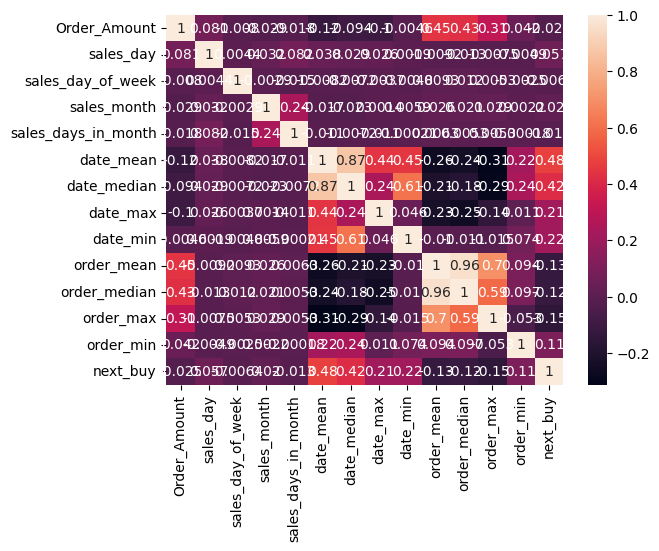

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data[feature + ["next_buy"]].corr(), annot=True)

In [86]:
model = LinearRegression()
x = outlier_data[feature]
y = outlier_data["next_buy"]

trained_model = model.fit(x_train, y_train)
y_pred = trained_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(1.814110408832765, 0.20960086219134866)

In [87]:
data

,Customer_Code,Sales_Order_date,Order_Amount,next_buy,sales_day,sales_day_of_week,sales_month,sales_days_in_month,date_mean,date_median,date_max,date_min,order_mean,order_median,order_max,order_min
0,14252,2021-09-01,461.0,4.0,1,2,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
1,14252,2021-09-05,322700.0,3.0,5,6,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
2,14252,2021-09-08,115250.0,1.0,8,2,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
3,14252,2021-09-09,691500.0,6.0,9,3,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
4,14252,2021-09-15,161350.0,1.0,15,2,9,30,3.027933,1.0,47.0,1.0,245908.374302,192400.0,1072600.0,461.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93732,87685,2023-08-14,115400.0,2.0,14,0,8,31,2.000000,2.0,2.0,2.0,115400.000000,115400.0,115400.0,115400.0
93733,87702,2023-08-14,397600.0,3.0,14,0,8,31,2.000000,2.0,3.0,1.0,269800.000000,284000.0,397600.0,113600.0
93734,87702,2023-08-17,369200.0,3.0,17,3,8,31,2.000000,2.0,3.0,1.0,269800.000000,284000.0,397600.0,113600.0
93735,87702,2023-08-20,113600.0,1.0,20,6,8,31,2.000000,2.0,3.0,1.0,269800.000000,284000.0,397600.0,113600.0


In [97]:
data.describe()

,date_mean,date_median,date_max,date_min,order_Customer_Code,order_mean,order_median,order_max,order_min
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,4.990000e+02,499.000000
mean,7.484886,5.114228,39.432866,2.733467,32573.857715,244810.878629,200987.886774,1.302595e+06,37093.445892
std,16.547971,14.994677,48.211601,14.761256,25864.497957,122963.862998,101304.391663,1.255054e+06,65760.798651
min,1.000000,1.000000,1.000000,1.000000,14252.000000,456.000000,456.000000,4.560000e+02,283.500000
25%,2.082498,1.000000,16.000000,1.000000,14854.500000,168857.929045,139375.000000,5.165250e+05,9932.500000
50%,3.781250,2.000000,24.000000,1.000000,15013.000000,215946.279070,176714.000000,8.906430e+05,23300.000000
75%,6.979798,4.750000,41.000000,1.000000,64184.500000,292126.401267,232600.000000,1.652805e+06,43000.000000
max,217.000000,217.000000,374.000000,217.000000,87702.000000,950000.000000,950000.000000,8.321828e+06,950000.000000


In [99]:
customer_group_1 = data[data["order_mean"] < 168857]
customer_group_2 = data[(data["order_mean"] < 292126) & (data["order_mean"]>= 168857)]
customer_group_3 = data[data["order_mean"]>= 292126]

In [103]:
model = xgb.XGBRegressor()
x = customer_group_1[feature]
y = customer_group_1["next_buy"]

x_train, x_test, y_train, y_test = train_test_split(
        x, y, random_state=1, test_size=0.3,
        shuffle=True)

trained_model = model.fit(x_train, y_train)
y_pred = trained_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(3.2690580312616206, -0.10810074720388152)

In [104]:
model = xgb.XGBRegressor()

x = customer_group_3[feature]
y = customer_group_3["next_buy"]

x_train, x_test, y_train, y_test = train_test_split(
        x, y, random_state=1, test_size=0.3,
        shuffle=True)
trained_model = model.fit(x_train, y_train)
y_pred = trained_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(1.0460613440613316, 0.1781125192147912)

In [105]:
customer_group_3[-5:]

,Customer_Code,Sales_Order_date,Order_Amount,next_buy,sales_day,sales_day_of_week,sales_month,sales_days_in_month,date_mean,date_median,date_max,date_min,order_mean,order_median,order_max,order_min
93718,87313,2023-08-04,139500.0,1.0,4,4,8,31,3.8,2.0,13.0,1.0,347634.0,297135.0,602640.0,83700.0
93719,87313,2023-08-05,306900.0,1.0,5,5,8,31,3.8,2.0,13.0,1.0,347634.0,297135.0,602640.0,83700.0
93720,87313,2023-08-06,602640.0,13.0,6,6,8,31,3.8,2.0,13.0,1.0,347634.0,297135.0,602640.0,83700.0
93721,87313,2023-08-19,83700.0,1.0,19,5,8,31,3.8,2.0,13.0,1.0,347634.0,297135.0,602640.0,83700.0
93722,87313,2023-08-20,279000.0,1.0,20,6,8,31,3.8,2.0,13.0,1.0,347634.0,297135.0,602640.0,83700.0


In [106]:
trained_model.predict(customer_group_3[-5:][feature])

array([ 5.0206423,  3.6966906, 11.243636 ,  1.9147688,  4.9561   ],
      dtype=float32)

In [107]:
mean_7 = data[data["date_mean"] <= 7]
mean_more_than_7 = data[data["date_mean"] > 7]

In [109]:
model = LinearRegression()

x = mean_7[feature]
y = mean_7["next_buy"]

x_train, x_test, y_train, y_test = train_test_split(
        x, y, random_state=1, test_size=0.3,
        shuffle=True)
trained_model = model.fit(x_train, y_train)
y_pred = trained_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(1.4842862978288716, 0.1384922960426218)

In [110]:
model = LinearRegression()

x = mean_more_than_7[feature]
y = mean_more_than_7["next_buy"]

x_train, x_test, y_train, y_test = train_test_split(
        x, y, random_state=1, test_size=0.3,
        shuffle=True)
trained_model = model.fit(x_train, y_train)
y_pred = trained_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(8.669608700284257, 0.22393410210820197)

In [114]:
mean_more_than_7.Customer_Code.nunique()

123

In [111]:
mean_more_than_7[-5:]

,Customer_Code,Sales_Order_date,Order_Amount,next_buy,sales_day,sales_day_of_week,sales_month,sales_days_in_month,date_mean,date_median,date_max,date_min,order_mean,order_median,order_max,order_min
93697,87283,2023-07-27,176100.0,8.0,27,3,7,31,9.5,10.0,13.0,5.0,220125.0,220125.0,293500.0,146750.0
93698,87283,2023-08-04,146750.0,5.0,4,4,8,31,9.5,10.0,13.0,5.0,220125.0,220125.0,293500.0,146750.0
93699,87283,2023-08-09,293500.0,12.0,9,2,8,31,9.5,10.0,13.0,5.0,220125.0,220125.0,293500.0,146750.0
93700,87311,2023-07-23,149685.0,17.0,23,6,7,31,11.0,11.0,17.0,5.0,162892.5,162892.5,176100.0,149685.0
93701,87311,2023-08-09,176100.0,5.0,9,2,8,31,11.0,11.0,17.0,5.0,162892.5,162892.5,176100.0,149685.0


In [112]:
trained_model.predict(mean_more_than_7[-5:][feature])

array([10.63289422,  7.87276006,  8.72916682, 10.81648738,  9.82751119])

In [117]:
mean_more_than_7

,Customer_Code,Sales_Order_date,Order_Amount,next_buy,sales_day,sales_day_of_week,sales_month,sales_days_in_month,date_mean,date_median,date_max,date_min,order_mean,order_median,order_max,order_min
184,14314,2021-09-08,148500.0,8.0,8,2,9,30,22.0,10.0,53.0,3.0,120214.285714,148500.0,198000.0,49500.0
185,14314,2021-09-16,49500.0,10.0,16,3,9,30,22.0,10.0,53.0,3.0,120214.285714,148500.0,198000.0,49500.0
186,14314,2021-09-26,148500.0,3.0,26,6,9,30,22.0,10.0,53.0,3.0,120214.285714,148500.0,198000.0,49500.0
187,14314,2021-09-29,49500.0,53.0,29,2,9,30,22.0,10.0,53.0,3.0,120214.285714,148500.0,198000.0,49500.0
188,14314,2021-11-21,198000.0,7.0,21,6,11,30,22.0,10.0,53.0,3.0,120214.285714,148500.0,198000.0,49500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93697,87283,2023-07-27,176100.0,8.0,27,3,7,31,9.5,10.0,13.0,5.0,220125.000000,220125.0,293500.0,146750.0
93698,87283,2023-08-04,146750.0,5.0,4,4,8,31,9.5,10.0,13.0,5.0,220125.000000,220125.0,293500.0,146750.0
93699,87283,2023-08-09,293500.0,12.0,9,2,8,31,9.5,10.0,13.0,5.0,220125.000000,220125.0,293500.0,146750.0
93700,87311,2023-07-23,149685.0,17.0,23,6,7,31,11.0,11.0,17.0,5.0,162892.500000,162892.5,176100.0,149685.0


In [125]:
data[data["Customer_Code"]==14849]

,Customer_Code,Sales_Order_date,Order_Amount,next_buy,sales_day,sales_day_of_week,sales_month,sales_days_in_month,date_mean,date_median,date_max,date_min,order_mean,order_median,order_max,order_min
30937,14849,2021-09-01,507100.0,1.0,1,2,9,30,1.496881,1.0,25.0,1.0,412957.575884,300300.0,2550000.0,42600.0
30938,14849,2021-09-02,69150.0,1.0,2,3,9,30,1.496881,1.0,25.0,1.0,412957.575884,300300.0,2550000.0,42600.0
30939,14849,2021-09-03,235500.0,1.0,3,4,9,30,1.496881,1.0,25.0,1.0,412957.575884,300300.0,2550000.0,42600.0
30940,14849,2021-09-04,46100.0,1.0,4,5,9,30,1.496881,1.0,25.0,1.0,412957.575884,300300.0,2550000.0,42600.0
30941,14849,2021-09-05,69150.0,1.0,5,6,9,30,1.496881,1.0,25.0,1.0,412957.575884,300300.0,2550000.0,42600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31413,14849,2023-08-16,245700.0,1.0,16,2,8,31,1.496881,1.0,25.0,1.0,412957.575884,300300.0,2550000.0,42600.0
31414,14849,2023-08-17,600600.0,2.0,17,3,8,31,1.496881,1.0,25.0,1.0,412957.575884,300300.0,2550000.0,42600.0
31415,14849,2023-08-19,191100.0,1.0,19,5,8,31,1.496881,1.0,25.0,1.0,412957.575884,300300.0,2550000.0,42600.0
31416,14849,2023-08-20,79716.0,1.0,20,6,8,31,1.496881,1.0,25.0,1.0,412957.575884,300300.0,2550000.0,42600.0


In [ ]:
import calendar

# Input year and month
year = 2023
month = 9

# Get the last day of the month
last_day = calendar.monthrange(year, month)[1]

# Iterate from the 1st date to the last date of the month
for day in range(1, last_day + 1):
    print(f"{year}-{month:02d}-{day:02d}")